# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2" # suppress info and warning messages
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(bookReviewDataSet_filename, header=0)

df.head()

,Review,Positive Review
0,This was perhaps the best of Johannes Steinhof...,True
1,This very fascinating book is a story written ...,True
2,The four tales in this collection are beautifu...,True
3,The book contained more profanity than I expec...,False
4,We have now entered a second time of deep conc...,True


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

#### Answer:

**1.** I chose the Book Review data set.  
**2.** I will be predicting whether the review is a positive review. The label is the 'Positive Review' column which contains True or False values to indicate whether the review is positive.  
**3.** This is a supervised learning and binary classification problem.  
**4.** My feature is the 'Review' column, which contains book reviews.  
**5.** This is an important problem because it can benefit a company on multiple perspectives:
- Automatically classifying reviews as positive or negative reduces the need for manual moderation, saving time and resources.  
- Identifying positive reviews can guide the company to suggest books that are more likely to be well-received, improving overall satisfaction and loyalty and increasing the likelihood of sales.
- Aggregating and analyzing review sentiments can also help the company to identify emerging trends and popular genres, staying ahead of the competition in the market.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

#### Answer:

In [3]:
print(f'(rows, columns): {df.shape}')
print(list(df.columns))
print(df.head(10))

(rows, columns): (1973, 2)
['Review', 'Positive Review']
                                              Review  Positive Review
0  This was perhaps the best of Johannes Steinhof...             True
1  This very fascinating book is a story written ...             True
2  The four tales in this collection are beautifu...             True
3  The book contained more profanity than I expec...            False
4  We have now entered a second time of deep conc...             True
5  I don't know why it won the National Book Awar...            False
6  The daughter of a prominent Boston doctor is d...            False
7  I was very disapointed in the book.Basicly the...            False
8  I think in retrospect I wasted my time on this...            False
9  I have a hard time understanding what it is th...            False


My prediction problem is a sentiment analysis, which is an NLP problem. Therefore, I will perform specific data cleaning and preprocessing techniques on the feature column, including removing punctuation and converting text to lowercase, removing stop words, and lemmatization. I will be using a neural network structure for my predictive problem and data, and will evaluate it using the accuracy evaluation metric

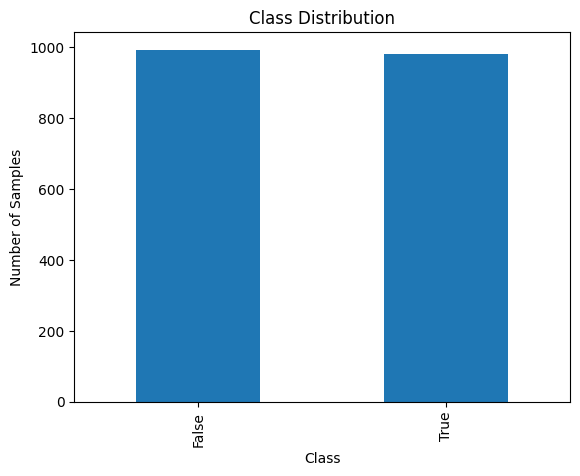

In [4]:
# Plot class distribution
df['Positive Review'].value_counts().plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution')
plt.show()

Since this is a classification problem, I checked the number of samples in each class to analyze class imbalances. By looking at the graph above, I found this data set to be very balanced.

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

#### Answer:

- No, I do not have a new feature list. Since I'm dealing with a NLP problem, I only have one feature, which is the review itself.
- For my prediction problem, since it is a NLP problem, I will perform preprocessing techniques including removing punctuation and converting text to lowercase, removing stop words, and lemmatization. Also, for the feature to work with the model, I will also transform the feature into numerical vectors using TfidfVectorizer.
- My model will be a neural network structure.
- **Model Building:** I will Construct a neural network model tailored for binary classification. The architecture will include input, hidden, dropout, and output layers, with activation functions ReLU for hidden layers and sigmoid for the output layer to predict the probability of a positive review.
- **Model Training and Validation:** THe model will be trained on the training set while using a portion of it for validation. This helps monitor the model’s performance during training and prevents overfitting.
- **Model Performance Analysis:** I will assess the model’s performance using the accuracy metrics on the test set, which will show us how well the model predicts.
- **Model Improvement:** I will experiment with different hyperparameters, such as the number of layers, units in each layer, learning rates, dropout rates, minimum document frequency, n-gram range, and number of epochs to find the optimal configuration for the model.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [5]:
!pip install pandas scikit-learn nltk


[notice] A new release of pip is available: 23.0.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


In [6]:
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as sklearn_stop_words
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet');

[nltk_data] Downloading package wordnet to /home/ubuntu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import time

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

#### Data Prepration

For my prediction problem, since it is a NLP problem, I perform preprocessing techniques including removing punctuation and converting text to lowercase, removing stop words, and lemmatization. Also, for the feature to work with the model, I will also transform the feature into numerical vectors using TfidfVectorizer.

In [8]:
# Preprocessing steps

def remove_review(review):
    # 1. Punctuation removing and lowercasing
    review = re.sub(r'[^\w\s]', '', review).lower()
    
    # 2. Stop words removing
    review = ' '.join([word for word in review.split() if word not in sklearn_stop_words])
    return review

# 3. Lemmatization
lemmatizer = WordNetLemmatizer()
def lemmatize_review(review):
    review = ' '.join([lemmatizer.lemmatize(word) for word in review.split()])
    return review

# Apply the preprocessing technique
df['Review'] = df['Review'].apply(remove_review)
df['Review'] = df['Review'].apply(lemmatize_review)

df

,Review,Positive Review
0,best johannes steinhoffs book doe deal stellar...,True
1,fascinating book story written form numerous l...,True
2,tale collection beautifully composed art just ...,True
3,book contained profanity expected read book ri...,False
4,entered second time deep concern science math ...,True
...,...,...
1968,purchased book intention teaching core materia...,True
1969,design book graphis series asure best work qua...,True
1970,thilled book available hardcover paperback rea...,True
1971,stated book start great promise people like hi...,False


In [9]:
# Create Labeled Examples from the Data Set

y = df['Positive Review']
X = df['Review']

In [10]:
# Create Training and Test Data Sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [11]:
# Vectroization Step

tfidf_vectorizer = TfidfVectorizer(min_df=7, ngram_range=(1,2))
tfidf_vectorizer.fit(X_train)
X_train_tfidf = tfidf_vectorizer.transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

#### Model Construction and Training

In [12]:
# 1. Create model object
nn_model = keras.Sequential()

# 2. Create the input layer and add it to the model object: 
vocabulary_size = len(tfidf_vectorizer.vocabulary_)
input_layer = keras.layers.InputLayer(input_shape=vocabulary_size)
nn_model.add(input_layer)

# 3. Create the first hidden layer and add it to the model object:
hidden_layer_1 = keras.layers.Dense(64, activation='ReLU')
nn_model.add(hidden_layer_1)
nn_model.add(keras.layers.Dropout(.20))


# 4. Create the second layer and add it to the model object:
hidden_layer_2 = keras.layers.Dense(32, activation='ReLU')
nn_model.add(hidden_layer_2)
nn_model.add(keras.layers.Dropout(.20))


# 5. Create the third layer and add it to the model object:
hidden_layer_3 = keras.layers.Dense(16, activation='ReLU')
nn_model.add(hidden_layer_3)
nn_model.add(keras.layers.Dropout(.20))


# 6. Create the output layer and add it to the model object:
output_layer = keras.layers.Dense(1, activation='sigmoid')
nn_model.add(output_layer)


# Print summary of neural network model structure
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                171776    
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 1

In [13]:
# Define the Optimization Function

sgd_optimizer = keras.optimizers.SGD(learning_rate=0.1)

In [14]:
# Define the Loss Function

loss_fn = keras.losses.BinaryCrossentropy(from_logits=False)

In [15]:
# Compile the Model

nn_model.compile(sgd_optimizer, loss_fn, metrics=['accuracy'])

In [16]:
# Define callback class

class ProgBarLoggerNEpochs(keras.callbacks.Callback):
    
    def __init__(self, num_epochs: int, every_n: int = 50):
        self.num_epochs = num_epochs
        self.every_n = every_n
    
    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.every_n == 0:
            s = 'Epoch [{}/ {}]'.format(epoch + 1, self.num_epochs)
            logs_s = ['{}: {:.4f}'.format(k.capitalize(), v)
                      for k, v in logs.items()]
            s_list = [s] + logs_s
            print(', '.join(s_list))

In [17]:
# Fit the Model on the Training Data

t0 = time.time() # start time

num_epochs = 17 # epochs

history = nn_model.fit(
    X_train_tfidf.toarray(), 
    y_train, 
    epochs=num_epochs, 
    verbose=0, 
    validation_split=0.2, 
    callbacks=[ProgBarLoggerNEpochs(num_epochs, every_n=5)])

t1 = time.time() # stop time

print('Elapsed time: %.2fs' % (t1-t0))

Epoch [5/ 17], Loss: 0.6896, Accuracy: 0.5393, Val_loss: 0.6914, Val_accuracy: 0.4764
Epoch [10/ 17], Loss: 0.6629, Accuracy: 0.6636, Val_loss: 0.6673, Val_accuracy: 0.6047
Epoch [15/ 17], Loss: 0.5194, Accuracy: 0.7726, Val_loss: 0.5418, Val_accuracy: 0.7297
Elapsed time: 1.27s


In [18]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

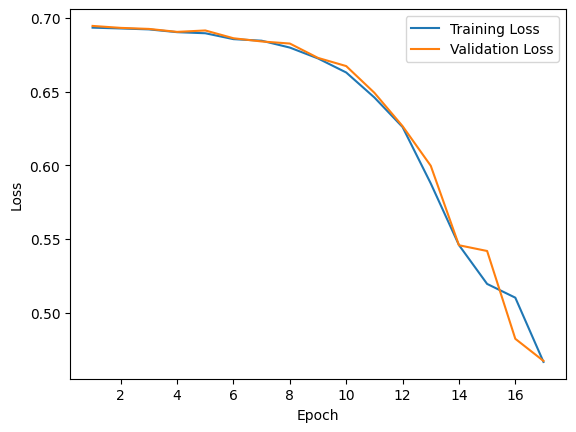

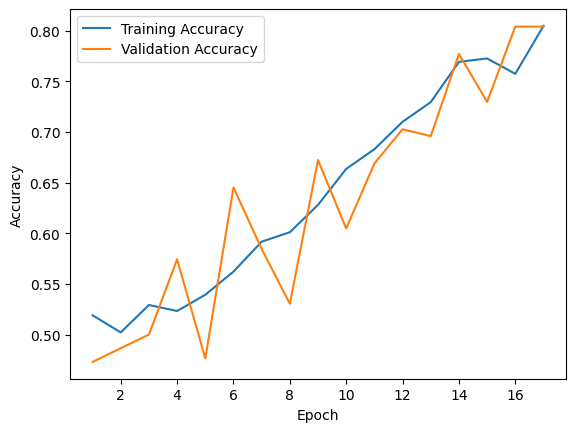

In [19]:
# Visualize the Model Performance

# Plot training and validation loss
plt.plot(range(1, num_epochs + 1), history.history['loss'], label='Training Loss')
plt.plot(range(1, num_epochs + 1), history.history['val_loss'], label='Validation Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(range(1, num_epochs + 1), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), history.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

We could see from the graph above the our training accuracy is very close to our validation accuracy, which means we successfully prevent overfitting by adding dropout layers and choose an appropriate epoch number.

#### Evaluating and Improving the Performance

In [20]:
# Calculating the loss and Accuracy

loss, accuracy = nn_model.evaluate(X_test_tfidf.toarray(), y_test)
print('Loss: ', str(loss) , 'Accuracy: ', str(accuracy))

16/16 [==============================] - 0s 634us/step - loss: 0.4755 - accuracy: 0.7874
Loss:  0.47546324133872986 Accuracy:  0.7874494194984436


To improve model's performance, here are the few things I tried:
* Adjust the learning rate.
* Add more hidden layers for the `unit` parameter in the hidden layers to change the number of nodes in the hidden layers.
* Fit vectorizer using different document frequency values and different n-gram ranges.

When creating a `TfidfVectorizer` object, use the parameter `min_df` to specify the minimum 'document frequency' and use `ngram_range=(1,2)` to change the default n-gram range of `(1,1)`.

The experiment result are as follows:
* **Original:**  
  Learning rate: 0.1; Num of hidden layers:3; Num of nodes: 64, 32, 16.  
  Time: 1.72s, Loss: 0.5115, Accuracy: 0.7530
* **Test 1:**  
  Learning rate: 0.01; Num of hidden layers:3; Num of nodes: 64, 32, 16.  
  Time: 2.13s, Loss: 0.6932, Accuracy: 0.4757
* **Test 2:**  
  Learning rate: 0.1; Num of hidden layers:3; Num of nodes: 64, 32, 16; min_df = 7; ngram_range=(1,2)  
  Time: 1.26s, Loss: 0.4648, Accuracy: 0.8077
* **Test 3:**  
  Learning rate: 0.1; Num of hidden layers:4; Num of nodes: 128, 64, 32, 16; min_df = 7; ngram_range=(1,2)  
  Time: 1.43s, Loss: 0.6094, Accuracy: 0.6943

From the above test, we could see that decreasing the learning rate to 0.01 negatively impacted both loss and accuracy, modifying the vectorizer parameters (min_df and ngram_range) improved accuracy, increasing the complexity of the neural network (more hidden layers and nodes) and adjusting vectorizer parameters also negatively impacted both accuracy and loss while also increased training time.
Therefore from my experiment, the best generalization performance was achieved by using more refined vectorizer parameters, which is test 2.